# Import required Lib

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
#import seaborn as sns

# Load Dataset

In [2]:
tem=pd.read_csv('data.csv')
                

In [19]:
tem

,x,y
0,12,39
1,20,39
2,28,30
3,18,52
4,29,54
5,33,46
6,24,55
7,45,59
8,45,63
9,52,70


In [4]:
df=tem[['x','y']]

In [5]:
df.head()

,x,y
0,12,39
1,20,39
2,28,30
3,18,52
4,29,54


In [6]:
df.shape


(19, 2)

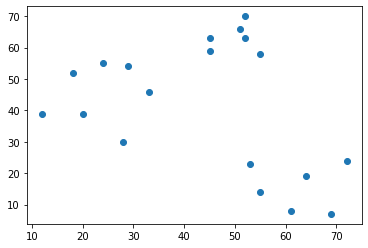

In [7]:
plt.scatter(df['x'],df['y'])

# Step 1 : Select the random points as Centroids

In [8]:
np.random.seed(200)
k=3
centroids= {
    i+1:[np.random.randint(0,80),
         np.random.randint(0,80)] for i in range(k)}
print(centroids)

{1: [26, 16], 2: [68, 42], 3: [55, 76]}


# plot the data points with centroid 

26 16 <class 'dict'>
68 42 <class 'dict'>
55 76 <class 'dict'>


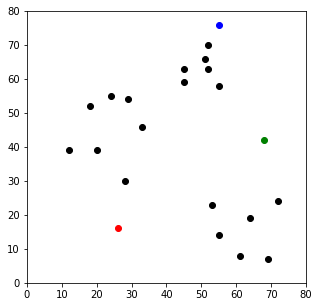

In [9]:
fig=plt.figure(figsize=(5,5))
plt.scatter(df['x'],df['y'],color='k')
colmap={1:'r',2:'g',3:'b'}

for i in centroids.keys():
    plt.scatter(*centroids[i],color=colmap[i])
    print(*centroids[i],type(centroids))
    
plt.xlim(0,80)
plt.ylim(0,80)
plt.show()

# Calculate distance and assign the data points to the closest centroid


In [10]:
# assign the data points to the closest centroid
def assignment(df,centroids):
    for i in centroids.keys():
        df['distance_from_{}'.format(i)]=(np.sqrt((df['x']-centroids[i][0])**2+(df['y']-centroids[i][1])**2))
    centroid_distance_cols=['distance_from_{}'.format(i) for i in centroids.keys()]
    
    df['closest']=df.loc[:,centroid_distance_cols].idxmin(axis=1)
    df['closest']=df['closest'].map(lambda x:int(x.lstrip('distance_from_')))
    df['color']=df['closest'].map(lambda x:colmap[x])     
    print(centroid_distance_cols)
    print(df)
    return df


df=assignment(df,centroids)

df

['distance_from_1', 'distance_from_2', 'distance_from_3']
     x   y  distance_from_1  distance_from_2  distance_from_3  closest color
0   12  39        26.925824        56.080300        56.727418        1     r
1   20  39        23.769729        48.093659        50.931326        1     r
2   28  30        14.142136        41.761226        53.338541        1     r
3   18  52        36.878178        50.990195        44.102154        1     r
4   29  54        38.118237        40.804412        34.058773        3     b
5   33  46        30.805844        35.227830        37.202150        1     r
6   24  55        39.051248        45.880279        37.443290        3     b
7   45  59        47.010637        28.600699        19.723083        3     b
8   45  63        50.695167        31.144823        16.401219        3     b
9   52  70        59.933296        32.249031         6.708204        3     b
10  51  66        55.901699        29.410882        10.770330        3     b
11  52  63        

,x,y,distance_from_1,distance_from_2,distance_from_3,closest,color
0,12,39,26.925824,56.080300,56.727418,1,r
1,20,39,23.769729,48.093659,50.931326,1,r
2,28,30,14.142136,41.761226,53.338541,1,r
3,18,52,36.878178,50.990195,44.102154,1,r
4,29,54,38.118237,40.804412,34.058773,3,b
5,33,46,30.805844,35.227830,37.202150,1,r
6,24,55,39.051248,45.880279,37.443290,3,b
7,45,59,47.010637,28.600699,19.723083,3,b
8,45,63,50.695167,31.144823,16.401219,3,b
9,52,70,59.933296,32.249031,6.708204,3,b


# Plot the datapoints after calcultaing & assigning the data point to the closest centroid

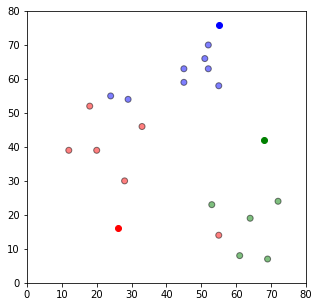

In [11]:
fig=plt.figure(figsize=(5,5))
plt.scatter(df['x'],df['y'],color=df['color'],alpha=0.5,edgecolor='k')
for i in centroids.keys():
    plt.scatter(*centroids[i],color=colmap[i])
plt.xlim(0,80)
plt.ylim(0,80)
plt.show()

# Update the centroid Position to make the correct groups of the misgrouped data points

In [12]:
import copy 
old_centroids=copy.deepcopy(centroids)

def update(k):
    for i in centroids.keys():
        centroids[i][0]=np.mean(df[df['closest']==i]['x'])
        centroids[i][1]=np.mean(df[df['closest']==i]['y'])
    return k

        

# Call Function to update

In [13]:
centroids=update(centroids)

# Plot to know whether centroid position is updated or not

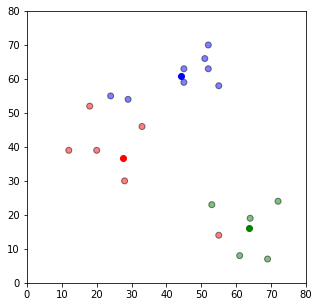

In [14]:
fig=plt.figure(figsize=(5,5))
plt.scatter(df['x'],df['y'],color=df['color'],alpha=0.5,edgecolor='k')
for i in centroids.keys():
    plt.scatter(*centroids[i],color=colmap[i])
plt.xlim(0,80)
plt.ylim(0,80)
plt.show()

# Repeat step 2 ie) call the assignment method to map the data points again with updated centroid position

In [15]:
df=assignment(df,centroids)

['distance_from_1', 'distance_from_2', 'distance_from_3']
     x   y  distance_from_1  distance_from_2  distance_from_3  closest color
0   12  39        15.839472        56.595760        38.936045        1     r
1   20  39         8.013877        49.378943        32.649895        1     r
2   28  30         6.674995        38.367695        34.943034        1     r
3   18  52        18.126101        58.131575        27.631786        1     r
4   29  54        17.384540        51.379763        16.666302        3     b
5   33  46        10.749677        42.856505        18.675268        1     r
6   24  55        18.696405        55.583091        21.000372        1     r
7   45  59        28.270519        46.746979         2.183031        3     b
8   45  63        31.526003        50.434909         2.183031        3     b
9   52  70        41.270113        55.078853        11.958914        3     b
10  51  66        37.481847        51.418674         8.500919        3     b
11  52  63        

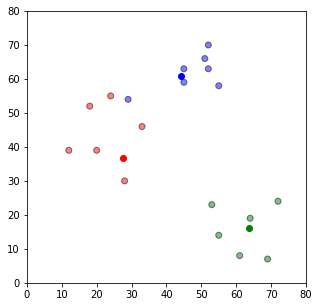

In [16]:
fig=plt.figure(figsize=(5,5))
plt.scatter(df['x'],df['y'],color=df['color'],alpha=0.5,edgecolor='k')
for i in centroids.keys():
    plt.scatter(*centroids[i],color=colmap[i])
plt.xlim(0,80)
plt.ylim(0,80)
plt.show()

['distance_from_1', 'distance_from_2', 'distance_from_3']
     x   y  distance_from_1  distance_from_2  distance_from_3  closest color
0   12  39        11.423660        55.408834        41.802500        1     r
1   20  39         5.147815        48.257699        35.375825        1     r
2   28  30        14.577380        37.141247        37.092823        1     r
3   18  52         9.617692        57.214266        30.629451        1     r
4   29  54        12.349089        50.673519        19.640130        1     r
5   33  46        10.793517        42.076980        21.152990        1     r
6   24  55        11.597414        54.803943        24.000425        1     r
7   45  59        27.322152        46.516723         3.487587        3     b
8   45  63        29.774150        50.250760         2.303502        3     b
9   52  70        39.654760        55.143500         9.555424        3     b
10  51  66        36.311155        51.430914         5.758756        3     b
11  52  63        

<function matplotlib.pyplot.show(*args, **kw)>

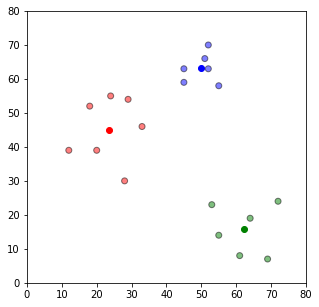

In [17]:
while True:
    closest_centroids=df['closest'].copy(deep=True)
    centroids=update(centroids)
    df=assignment(df,centroids)
    if closest_centroids.equals(df['closest']):
        break
fig=plt.figure(figsize=(5,5))
plt.scatter(df['x'],df['y'],color=df['color'],alpha=0.5,edgecolor='k')
for i in centroids.keys():
    plt.scatter(*centroids[i],color=colmap[i])
plt.xlim(0,80)
plt.ylim(0,80)
plt.show


# How to find the optimum k value with L-Bow method

In [18]:
from sklearn.cluster import KMeans
for k in range(1, 10):
    kmeans = KMeans(n_clusters=k, max_iter=1000).fit(tem)
    df["clusters"] = kmeans.labels_
    #print(data["clusters"])
    sse[k] = kmeans.inertia_ # Inertia: Sum of distances of samples to their closest cluster center
plt.figure()
plt.plot(list(sse.keys()), list(sse.values()))
plt.xlabel("Number of cluster-K value")
plt.ylabel("WCSS-Within Cluster Sum of Squared errors")
plt.show()

NameError: name 'sse' is not defined

AS we seen in the L-Bow Curve -when K is 3 the sse value gets flatter merely.


Hence that is the point the best k value is been freezed.